# Linear fit with constraints - elimination
Author: Aleksander Filip Żarnecki (University of Warsaw)

### (0) Import libraries 

In [1]:
import math
from ROOT import *
import numpy as np
from array import array
from scipy.stats import f

# For inline image display
from IPython.display import Image

Welcome to JupyROOT 6.24/04


### (1) ROOT settings

In [2]:
# Set ROOT graphics options

gROOT.SetStyle("Plain")

# Default canvas  size

gStyle.SetCanvasDefW(600)
gStyle.SetCanvasDefH(400)
 
# set the margins
  
gStyle.SetPadBottomMargin(0.18)
gStyle.SetPadTopMargin(0.08)
gStyle.SetPadRightMargin(0.08)
gStyle.SetPadLeftMargin(0.17)

# set the number of divisions to show

gStyle.SetNdivisions(510, "xy")

# show grid

gStyle.SetPadGridX(1)
gStyle.SetPadGridY(1)

# border ploted only around statistics

gStyle.SetPadBorderMode(0)
gStyle.SetFrameBorderMode(0)
gStyle.SetLegendBorderSize(0)
gStyle.SetTitleBorderSize(0)
gStyle.SetStatBorderSize(1)

# Text sizes

gStyle.SetTextSize(0.05)
gStyle.SetTitleSize(0.06,"xyz")
gStyle.SetLabelSize(0.05,"xyz")

gStyle.SetLabelOffset(0.015,"xyz")
gStyle.SetTitleOffset(1.2,"yz")
gStyle.SetTitleOffset(1.0,"x")

# Font settings

font = 42
gStyle.SetTitleFont(font)
gStyle.SetTitleFontSize(0.05)
gStyle.SetStatFont(font)
gStyle.SetStatFontSize(0.06)
gStyle.SetTextFont(font)
gStyle.SetLabelFont(font,"xyz")
gStyle.SetTitleFont(font,"xyz")
gStyle.SetLegendFont(font)

# Line settings

gStyle.SetHistLineWidth(2)
gStyle.SetFrameLineWidth(2)
gStyle.SetFuncWidth(2)
gStyle.SetHistLineColor(kBlue)
gStyle.SetFuncColor(kRed)

# Log scale
gStyle.SetOptLogy(0)

# Histogram title
gStyle.SetOptTitle(1)  

# Histogram statistics
gStyle.SetOptStat(1100)

# Fit results
gStyle.SetOptFit(0) 


### (2) Definition of model

Consider controlled parameter range is [-1,1]

In [3]:
# True functional dependece

def mytrue(x):
    
    val = 0.5 + 0.5*np.cos(x*np.pi + 0.5*np.cos(x*np.pi/2.))

    return val

# Basic functions:  1, x, x^2, x^3 ...

def myfun(x,ifun):

    return np.power(x,ifun)

# Full model

def mymodel(x,par):

    val = np.zeros(x.size)
    
    for ip in range(par.size):
        val+=par[ip]*myfun(x,ip)
        
    return val


### (3) Generate pseudo data to fit

In [4]:
# Considered values of x

xvec = np.linspace(-0.95,0.95,20)

# Measurement precision

svec = np.linspace(0.02,0.03,xvec.size)
s2vec = svec*svec

# Pseudo-data

yvec = np.random.normal(mytrue(xvec),svec)


### (4)  Linear fit without constraint

In [37]:
# Number of model functions to consider 

Nfun = 10

A = np.zeros((Nfun,Nfun))

B = np.zeros(Nfun)

for l in range(Nfun):
    fl = myfun(xvec,l)
    B[l] = np.sum(fl*yvec/s2vec)
    for k in range(Nfun):
        fk = myfun(xvec,k)
        A[l,k] = np.sum(fl*fk/s2vec)


# Inverse of matrix

Cov = np.linalg.inv(A)

# Solution to the problem

par = Cov @ B

# Parameter uncertainties

epar = np.sqrt(np.diagonal(Cov))

print("\n Fit results:\n\n     par         sigma_p\n")

for ip in range(par.size):
    print("  %8.3f  +/- %6.3f " % (par[ip],epar[ip]))

# Calculate correlation matrix, including rounding

Corr = Cov

print("\n Correlation matrix\n")
for ip in range(par.size):
    for jp in range(par.size):
        Corr[ip,jp]=int(1000.*Corr[ip,jp]/epar[ip]/epar[jp]+0.5)/1000.
        
    print(Corr[ip,:])

# Fitted function

fvec = mymodel(xvec,par) 

# Chi^2 printout

chi2 = np.sum((yvec-fvec)**2/s2vec)

print("\n chi^2 =  %8.3f   chi^2/Ndf = %8.5f " % (chi2,chi2/(xvec.size-Nfun)))

# print("\n  x       y         f(x) ")
# for ix in range(xvec.size):
#     print("%6.3f  %8.5f  %8.5f " % (xvec[ix],yvec[ix],fvec[ix]))


 Fit results:

     par         sigma_p

     0.950  +/-  0.014 
    -0.682  +/-  0.093 
    -2.151  +/-  0.299 
     1.122  +/-  1.158 
     1.146  +/-  1.551 
     1.357  +/-  4.508 
     0.796  +/-  2.740 
    -3.911  +/-  6.726 
    -0.783  +/-  1.532 
     2.218  +/-  3.367 

 Correlation matrix

[ 1.     0.063 -0.745 -0.079  0.604  0.086 -0.522 -0.087  0.471  0.089]
[ 0.063  1.    -0.045 -0.916  0.037  0.824 -0.031 -0.752  0.028  0.701]
[-0.745 -0.045  1.     0.107 -0.959 -0.135  0.902  0.152 -0.85  -0.159]
[-0.079 -0.916  0.107  1.    -0.101 -0.975  0.095  0.937 -0.089 -0.898]
[ 0.604  0.037 -0.959 -0.101  1.     0.142 -0.984 -0.164  0.958  0.179]
[ 0.086  0.824 -0.135 -0.975  0.142  1.    -0.138 -0.989  0.135  0.969]
[-0.522 -0.031  0.902  0.095 -0.984 -0.138  1.     0.167 -0.992 -0.184]
[-0.087 -0.752  0.152  0.937 -0.164 -0.989  0.167  1.    -0.165 -0.994]
[ 0.471  0.028 -0.85  -0.089  0.958  0.135 -0.992 -0.165  1.     0.187]
[ 0.089  0.701 -0.159 -0.898  0.179  0.969 -0.18

### (5)  Linear fit of reduced model

In [38]:
# Number of constraints

Ncon = 2

# Number of parameters in "reduced function" 

Nred = Nfun-Ncon

# reduced model
# Constrains included in the functions formula
# For given number of input parameters, additional terms added to
# take constraints into account (one for even and one for odd terms)

def myred(x,par):

    parsum = np.zeros(2)
    
    for ip in range(par.size):
        parsum[ip%2] -= par[ip]
        
    npar = np.zeros(par.size+2)

    npar[:par.size]=par
    npar[par.size] = parsum[par.size%2]
    npar[par.size+1] = parsum[(par.size+1)%2]
    
    val = np.zeros(x.size)
    
    for ip in range(npar.size):
        val+=npar[ip]*myfun(x,ip)
        
    return val


Ar = np.zeros((Nred,Nred))

Br = np.zeros(Nred)

# additional terms for even and odd powers

lc = np.empty(2, dtype=int)

if Nred%2 == 0 :
    lc[0] = Nred
    lc[1] = Nred+1
else:    
    lc[0] = Nred+1
    lc[1] = Nred

# Calculate arrays including constrain terms

for l in range(Nred):
    fl = myfun(xvec,l) - myfun(xvec,lc[l%2])
    Br[l] = np.sum(fl*yvec/s2vec)
    for k in range(Nred):
        fk = myfun(xvec,k) - myfun(xvec,lc[k%2])
        Ar[l,k] = np.sum(fl*fk/s2vec)


# Inverse of matrix

RCov = np.linalg.inv(Ar)

# Solution to the problem

parr = RCov @ Br

# Parameter uncertainties

eparr = np.sqrt(np.diagonal(RCov))

print("\n Fit results:\n\n     par         sigma_p\n")

for ip in range(parr.size):
    print("  %8.3f  +/- %6.3f " % (parr[ip],eparr[ip]))

# Calculate correlation matrix, including rounding

RCorr = RCov

print("\n Correlation matrix\n")
for ip in range(parr.size):
    for jp in range(parr.size):
        RCorr[ip,jp]=int(1000.*RCorr[ip,jp]/eparr[ip]/eparr[jp]+0.5)/1000.
        
    print(RCorr[ip,:])

# Fitted function

frvec = myred(xvec,parr) 

# Chi^2 printout

chi2r = np.sum((yvec-frvec)**2/s2vec)

print("\n chi^2 =  %8.3f   chi^2/Ndf = %8.5f " % (chi2r,chi2r/(xvec.size-Nred)))

# print("\n  x       y         f(x) ")
# for ix in range(xvec.size):
#     print("%6.3f  %8.5f  %8.5f " % (xvec[ix],yvec[ix],fvec[ix]))


 Fit results:

     par         sigma_p

     0.952  +/-  0.014 
    -0.744  +/-  0.083 
    -2.261  +/-  0.253 
     2.166  +/-  0.892 
     1.863  +/-  1.156 
    -3.254  +/-  3.026 
    -0.636  +/-  1.807 
     3.448  +/-  3.964 

 Correlation matrix

[ 1.     0.068 -0.744 -0.087  0.601  0.095 -0.518 -0.096]
[ 0.068  1.    -0.048 -0.914  0.039  0.818 -0.033 -0.741]
[-0.744 -0.048  1.     0.116 -0.958 -0.149  0.899  0.168]
[-0.087 -0.914  0.116  1.    -0.11  -0.974  0.104  0.931]
[ 0.601  0.039 -0.958 -0.11   1.     0.156 -0.984 -0.182]
[ 0.095  0.818 -0.149 -0.974  0.156  1.    -0.152 -0.987]
[-0.518 -0.033  0.899  0.104 -0.984 -0.152  1.     0.186]
[-0.096 -0.741  0.168  0.931 -0.182 -0.987  0.186  1.   ]

 chi^2 =    13.436   chi^2/Ndf =  1.11964 


In [39]:

dchi = chi2r - chi2

F = (dchi/Ncon)/(chi2/(xvec.size-Nfun))

print("\n F statistics for constraint: %.3f " % (F))

p = f.sf(F,Ncon,xvec.size-Nfun)

print("\n Statistical fluctuation probability p = %.3g" % (p))



 F statistics for constraint: 1.244 

 Statistical fluctuation probability p = 0.329


### (6) Draw data and fit

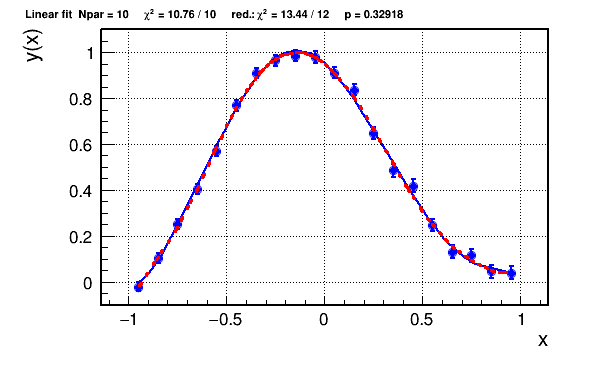

Warning in <TCanvas::Constructor>: Deleting canvas with same name: cexp
Info in <TCanvas::Print>: png file 08_reduce_10.png has been created


In [40]:
# Lin scale

gStyle.SetOptLogy(0)

# Create plot canvas

# gStyle.SetCanvasDefH(600)  # Default is 600 x 400

cexp = TCanvas('cexp')
   
## Pseudo-data graph

dgr=TGraphErrors(xvec.size,array('d',xvec),array('d',yvec),0,array('d',svec))
dgr.SetNameTitle('dgr','Linear fit  Npar = '+str(Nfun)+'     #chi^{2} = '+str(int(100*chi2+0.5)/100.)+' / '+str(xvec.size-Nfun)
                +'     red.: #chi^{2} = '+str(int(100*chi2r+0.5)/100.)+' / '+str(xvec.size-Nred)
                +'     p = '+str(round(p,5)))
    
# Graphic style

dgr.GetXaxis().SetTitle("x")
dgr.GetYaxis().SetTitle("y(x)")
dgr.SetMarkerStyle(20)
dgr.SetMarkerSize(1.0)
dgr.SetMarkerColor(4)
dgr.SetLineColor(4)
dgr.SetLineWidth(2)
dgr.SetLineStyle(1)
   
dgr.SetMinimum(-0.1)
dgr.SetMaximum(1.1)
dgr.Draw('AWP')

# Fitted dependence wraper for root

def myfit(x, par):
    
    val = 0
    
    for ip in range(Nfun):
        val+=par[ip]*myfun(x[0],ip)
        
    return val

# Reduced dependence wraper for root

def myrfit(x, fpar):
    
    xvec = np.array([x[0]])

    tpar = np.empty(Nred)
    for ip in range(Nred): tpar[ip]=fpar[ip]
    
    val = myred(xvec,tpar)
        
    return val


# Define user function

fexp=TF1("fexp",myfit,-1.,1.,Nfun)
frexp=TF1("frexp",myrfit,-1.,1.,Nred)

for ip in range(Nfun):
    fexp.SetParameter(ip,par[ip])
    
for ip in range(Nred):
    frexp.SetParameter(ip,parr[ip])
    
fexp.SetNpx(20)
fexp.SetLineStyle(7)
fexp.SetLineColor(2)
fexp.SetLineWidth(3)

frexp.SetNpx(20)
frexp.SetLineStyle(1)
frexp.SetLineColor(4)

frexp.DrawCopy("Csame")
fexp.DrawCopy("Csame")

cexp.Update()
fname = '08_reduce_'+str(Nfun)+'.png'
cexp.Print(fname)

Image(filename=fname)